    Task to make a plot based on the following data:
    1.CEC Forest biome map://www.cec.org/north-american-environmental-atlas/north-american-forests-2011/ 
    2.Belmanip2:http://calvalportal.ceos.org/web/olive/site-description
    3.Canada LAI
    4.USA LAI
    5.USA Canada boundary

In [7]:
import eeconvert
import ee
ee.Initialize()
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

In [8]:
### read data
NA_Forest = gpd.read_file('..\\NA_Forests\\NA_Forests_1to10mill.shp') # North American Forest
boundary = gpd.read_file('USA_Canada_Extent.shp') #USA and Canada Boundary
Canada_LAI= pd.read_csv('In-situLAI_Canada_2017_2019_location.csv') #Canda LAI
USA_LAI= pd.read_csv('GBOV_RM07_all_coordinate.csv')#USA LAI
Belmanip= pd.read_csv('OLIVE_DATASETS.csv') #Belmanip 2 data
tilesCollection = ee.FeatureCollection('users/ganghong/TilesSampling');

In [9]:
###data preparation
NA_Forest=NA_Forest.to_crs(epsg=4326)
#vaidate geometry of polygons 
boundary['geometry'] = boundary.buffer(0)
#boundary[~boundary.is_valid]
NA_Forest['geometry']=NA_Forest.buffer(0)
#NA_Forest[~NA_Forest.is_valid]
NA_Forest_clipped=gpd.clip(NA_Forest,boundary)
NA_Forest_selected=NA_Forest_clipped.loc[~NA_Forest_clipped['EZMAP_CODE'].isin(['34','24', '25', '22']), :]

# creating a geometry column 
CanadaLAI_geometry = [Point(xy) for xy in zip(Canada_LAI['LONG'], Canada_LAI['LAT'])]
USALAI_geometry = [Point(xy) for xy in zip(USA_LAI['Lon_IS'], USA_LAI['Lat_IS'])]
Belmanip_geometry = [Point(xy) for xy in zip(Belmanip['Lon_cent'], Belmanip['Lat_cent'])]
# Coordinate reference system : WGS84
#crs1 = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
CanadaLAI_gdf = gpd.GeoDataFrame(Canada_LAI, crs='epsg:4326', geometry=CanadaLAI_geometry)
USALAI_gdf = gpd.GeoDataFrame(USA_LAI, crs='epsg:4326', geometry=USALAI_geometry)
Belmanip_gdf = gpd.GeoDataFrame(Belmanip, crs='epsg:4326', geometry=Belmanip_geometry)
Belmanip_gdf_subset = gpd.clip(Belmanip_gdf, boundary) #USACanada boundary
Belmanip_gdf_subset1 = gpd.clip(Belmanip_gdf_subset, NA_Forest_selected)# remove some points falling in desert and non interested areas
#tiles
tiles_gdf =eeconvert.fcToGdf(tilesCollection)

C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\ipykernel_launcher.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  
C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\ipykernel_launcher.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


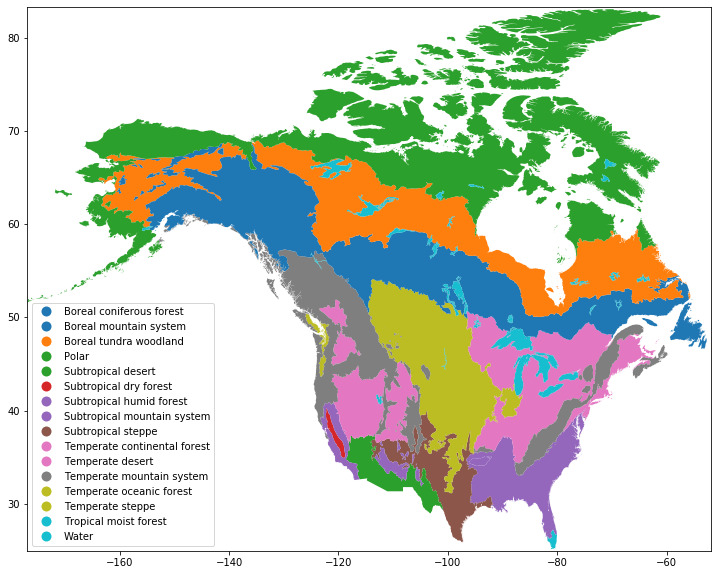

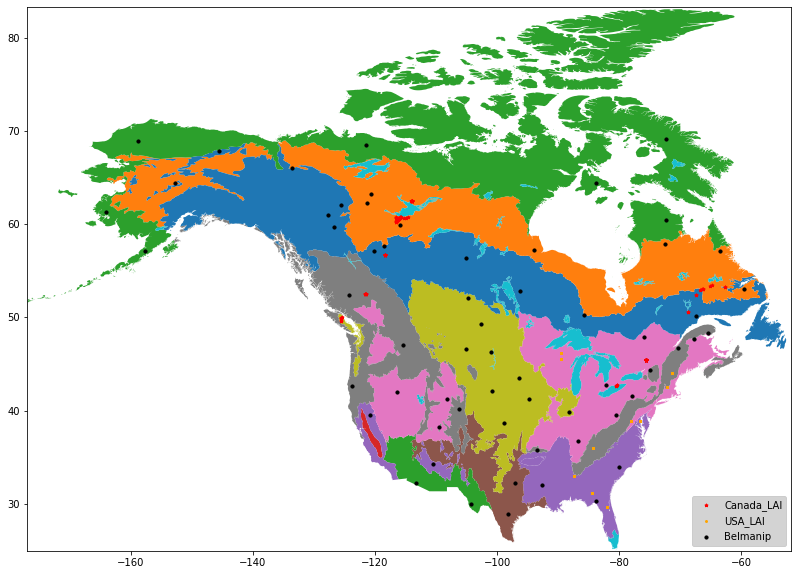

In [11]:
###plot data
fig0, ax0 = plt.subplots(figsize = (15,10))

#xlim = ([NA_Forest.total_bounds[0],  NA_Forest.total_bounds[2]])
#ylim = ([NA_Forest.total_bounds[1],  NA_Forest.total_bounds[3]])
xlim = ([boundary.total_bounds[0],  boundary.total_bounds[2]])
ylim = ([boundary.total_bounds[1],  boundary.total_bounds[3]])

ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
base0=NA_Forest_clipped.plot(column='EZMAP_ZONE',legend=True,legend_kwds={'loc': 'lower left'},ax=ax0) 
fig0.savefig('Plot0.jpeg',dpi=200)
fig, ax = plt.subplots(figsize = (15,10))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
base=NA_Forest_clipped.plot(column='EZMAP_ZONE',ax=ax) 
CanadaLAI_gdf.plot(ax=base, marker='*', color='red', markersize=10, label='Canada_LAI');
USALAI_gdf.plot(ax=base, marker='.', color='orange', markersize=15, label='USA_LAI');
Belmanip_gdf_subset.plot(ax=base, marker='o', color='black', markersize=10,label='Belmanip');
leg=ax.legend(loc="lower right",facecolor='lightgrey', framealpha=1)
fig.savefig('Plot1.jpeg',dpi=200)

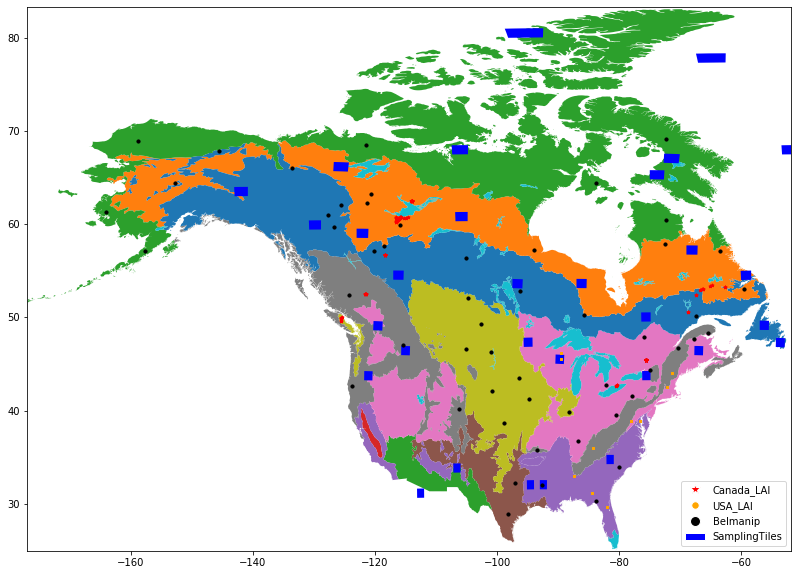

In [5]:
##another plot
fig1, ax1 = plt.subplots(figsize = (15,10))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
base1=NA_Forest_clipped.plot(column='EZMAP_ZONE', legend=True,legend_kwds={'loc': 'lower left'},ax=ax1) 
#tiles_gdf.plot(ax=base1, color='blue', label='SamplingTiles');
#CanadaLAI_gdf.plot(ax=base1, marker='*', color='red', markersize=10, label='Canada_LAI');
#USALAI_gdf.plot(ax=base1, marker='x', color='white', markersize=10, label='USA_LAI');
#Belmanip_gdf_subset1.plot(ax=base1, marker='o', color='black', markersize=10,label='Belmanip');
tiles_gdf.plot(ax=base1, color='blue');#, label='SamplingTiles');
CanadaLAI_gdf.plot(ax=base1, marker='*', color='red', markersize=10);#, label='Canada_LAI');
USALAI_gdf.plot(ax=base1, marker='.', color='orange', markersize=10);#, label='USA_LAI');
Belmanip_gdf_subset1.plot(ax=base1, marker='o', color='black', markersize=10);#,label='Belmanip');

legend_elements = [ Line2D([0], [0], marker='*', color='w', markersize=10, label='Canada_LAI',markerfacecolor='red'),
                    Line2D([0], [0], marker='.', color='w', markersize=15, label='USA_LAI',markerfacecolor='orange'),      
                    Line2D([0], [0], marker='o', color='w', markersize=10,label='Belmanip', markerfacecolor='black'),
                    Patch(facecolor='blue', edgecolor='w', label='SamplingTiles')]
leg=ax1.legend(handles=legend_elements, loc="lower right");#,facecolor='lightgrey', framealpha=1)
fig1.savefig('Plot2.jpeg',dpi=200)

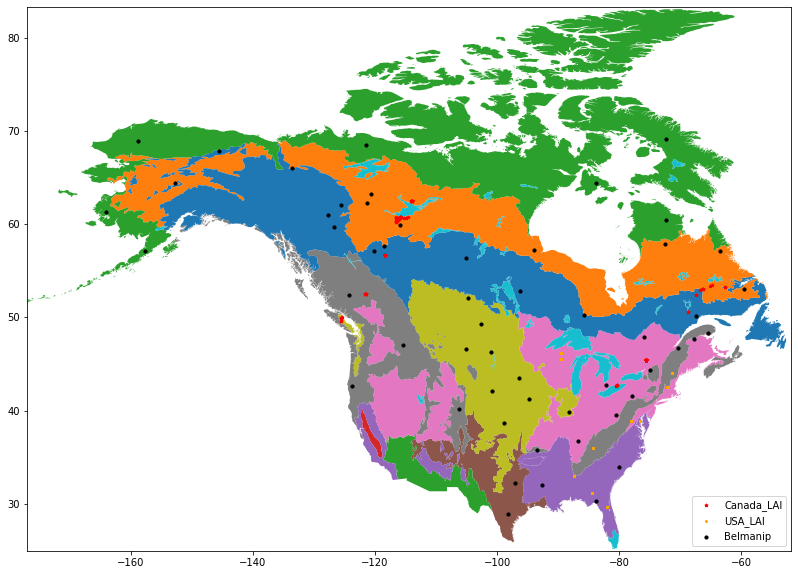

In [13]:
##another plot
fig2, ax2 = plt.subplots(figsize = (15,10))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
base2=NA_Forest_clipped.plot(column='EZMAP_ZONE', legend=True,legend_kwds={'loc': 'lower left'},ax=ax2) 
#tiles_gdf.plot(ax=base1, color='blue', label='SamplingTiles');
CanadaLAI_gdf.plot(ax=base2, marker='*', color='red', markersize=10, label='Canada_LAI');
USALAI_gdf.plot(ax=base2, marker='.', color='orange', markersize=15, label='USA_LAI');
Belmanip_gdf_subset1.plot(ax=base2, marker='o', color='black', markersize=10,label='Belmanip');
leg=ax2.legend(loc="lower right");#,facecolor='lightgrey', framealpha=1)
fig2.savefig('Plot3.jpeg',dpi=200)